# Comparing Diffrent Media Forms

In this section we will be comparing how ingest of different media forms can be used as an indicator for political engagement. More specifically, political engagement that is an action to help the political process. We will not be paying attention to those actions of collecting more information about a political party or cause. We want to see different media forms get people out and making a difference for causes they care about.      

Media questions are split up into both traditional and social media forms. For traditional media, this is broken down is each person surveyed was asked "In general, how much would you say that you learn about politics from the following sources, regardless of the format (online or offline) in which you usually use/watch them?" They had 5 options, "Learn nothing at all" which is given a value of 1, "Don’t learn much" which is given a value of 2, "Learn something" which is given a value of 3, "Learn a great deal" which is given a value of 4, and "Never use/watch" which is given a value of 9. For social media, the question that was asked was, "how often do you use any of the following websites or social media platforms, if at all?" Those surveyed had to pick one of the following answers for each social media platform, "Never" which is given a value of 1, "Less than once a month" which is given a value of 2, "Once a month" which is given a value of 3, "2-3 times a month" which is given a value of 4, "Once a week" which is given a value of 5, "2-3 times a week" which is given a value of 6, "Daily" which is given a value of 7, and  "Multiple times per day" which is given a value of 8. 

The engagement section asked survey participants about their political engagement in the previous year using the following question, " Please tell us if you have engaged in any of the following activities over the past year, either online (using the internet), offline (in person, via phone, etc.), or both." The participants answered by selecting one of the following per action, "Not in the past year" which is given a value of 1, "Yes – online and offline" which is given a value of 2, "Yes – offline only (in person, via phone etc." which is given a value of 3, and "Yes – online only" which is given a value of 4. 

We will look at which direction, positive or negative, of corrilation diffrent media forms has on engagement, as well was, various p-scores values of diffrent forms of media in comparison 

In [91]:
!pip install joblib

import pandas as pd
import numpy as np
import joblib
from scipy.stats import chi2_contingency
from time import time
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import ipywidgets as ipw
from ipywidgets import HBox, VBox,Label
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
data = joblib.load ('GroupedAndUngroupedData.pkl')

In [93]:
def ShowTwoWayHeatmap (df, row, col, normalize = False, colSort=[], rowSort=[]):
    """
    Little function to help with creation of heatmaps.
    @params:
        df                  - required - dataframe containing data to be mapped
        row                 - required - name of column in df to plot on the rows
        col                 - required - name of column in df to plot on the columns
        normalize           - optional - specifies whether the table should be normalized along 'index', 'column', 'all' (or True), or neither (False)
        rowSort             - optional - list specifying how the values in the rows should be sorted
        colSort             - optional - list specifying how the values in the columns should be sorted|
    """
    ctab = pd.crosstab (data[row], data[col], normalize = normalize)
    if rowSort:
        ctab = ctab.loc[rowSort]
    if colSort:
        ctab = ctab[colSort]
    if normalize:
        mult = 100
        fmt = '%.2f%%'
    else:
        mult = 1
        fmt = '%.0f'
    fig = plt.figure()
    fig.set_size_inches(13,6)
    heatmap = plt.pcolor(ctab)
    for y in range (ctab.shape[0]):
        for x in range (ctab.shape[1]):
            plt.text (x + 0.5, y + 0.5, fmt % (ctab.iloc[y,x] * mult),
                       ha='center', va='center')
    plt.yticks(np.arange(len (ctab.index))+0.5, ctab.index)
    plt.xticks(np.arange(len (ctab.columns))+0.5, ctab.columns, rotation=90)
    plt.colorbar(heatmap)
    plt.title(f'{row} vs {col}')
    plt.xlabel(col)
    plt.ylabel(row)
    plt.show()
def ShowGroupedBar(df, x, groupVar, categoryArrayOrder=[]):
    """
    Little function to help with creation of grouped bar charts.
    @params:
        df                  - required - dataframe containing data to be mapped
        x                   - required - name of column in df to plot on the X axis
        groupvar            - required - list of columns in df to color / group the bars by 
        categoryArrayOrder  - optional - ordered list indicating how the X axis should be sorted
    """
    scores = df[[x, *groupVar]].melt(id_vars=x)
    scores = scores.groupby([x, 'variable']).sum().reset_index()
    p = px.bar (scores, x=x, y='value', color='variable', barmode='group')
    p = p.for_each_trace(lambda t: t.update(name=t.name.split('=')[1]))
    p = p.for_each_trace(lambda t: t.update(name=t.name.split('_')[0]))
    p = p.update_xaxes(type='category', categoryorder='array', categoryarray=categoryArrayOrder)
    p.show()

In [94]:
results = joblib.load ('Chi2Results.pkl')

In [95]:
pd.set_option('display.max_rows', None)

In [96]:
#results

# Corrilation Matrix

In [97]:
action_sub = data[['pyRaisedMoneyForCharity', 'pyDonatedMoneyForCause','pyBoycottedForCause', 'pyContacedPolitican', 'pyVoted', 'pyBoughtForCause', 'pySignedPetition', 'pyAttendedRally']]

In [98]:
action_sub.tail()

,pyRaisedMoneyForCharity,pyDonatedMoneyForCause,pyBoycottedForCause,pyContacedPolitican,pyVoted,pyBoughtForCause,pySignedPetition,pyAttendedRally
1223,4,3,2,4,2,3,4,3
1224,3,1,1,1,1,1,1,1
1225,1,1,1,1,3,1,1,1
1226,3,4,1,1,3,1,1,1
1227,3,1,1,4,1,1,1,1


In [99]:
info_sub = data[['USAPoliticalNewsCableTV', 'USAPoliticalNewsSourceRadio', 'USAPoliticalNewsSourceDailyNewspapers', 'USAPoliticalNewsSourceWeeklyMagazines', 'USAPoliticalNewsSourceNetworkTV', 'USAPoliticalNewsSourceLocalTV', 'USAPoliticalNewsSourceLateNightTV', 'USAPoliticalNewsSourceComedyTV', 'socialMediaUseFacebook', 'socialMediaUseTwitter', 'socialMediaUseLinkedIn', 'socialMediaUseYouTube', 'socialMediaUseInstagram', 'socialMediaUsePinterest', 'socialMediaUseReddit', 'socialMediaUseMyspace', 'socialMediaUseGooglePlus', 'socialMediaUseFoursquare' ]] 

In [100]:
#info_sub.tail()

In [101]:
combined_sub = pd.concat([action_sub, info_sub], axis=1)

In [102]:
#combined_sub.tail()

In [103]:
combined_sub.corr().style.background_gradient(cmap='coolwarm')

,pyRaisedMoneyForCharity,pyDonatedMoneyForCause,pyBoycottedForCause,pyContacedPolitican,pyVoted,pyBoughtForCause,pySignedPetition,pyAttendedRally,USAPoliticalNewsCableTV,USAPoliticalNewsSourceRadio,USAPoliticalNewsSourceDailyNewspapers,USAPoliticalNewsSourceWeeklyMagazines,USAPoliticalNewsSourceNetworkTV,USAPoliticalNewsSourceLocalTV,USAPoliticalNewsSourceLateNightTV,USAPoliticalNewsSourceComedyTV,socialMediaUseFacebook,socialMediaUseTwitter,socialMediaUseLinkedIn,socialMediaUseYouTube,socialMediaUseInstagram,socialMediaUsePinterest,socialMediaUseReddit,socialMediaUseMyspace,socialMediaUseGooglePlus,socialMediaUseFoursquare
pyRaisedMoneyForCharity,1,0.420501,0.355125,0.310845,0.235568,0.355036,0.282069,0.422692,-0.0303914,-0.042501,-0.0634509,-0.0974963,-0.0190991,-0.0277349,-0.0761759,-0.079356,0.0369131,0.168904,0.2316,0.0818646,0.182371,0.194454,0.206982,0.226999,0.18578,0.260459
pyDonatedMoneyForCause,0.420501,1,0.375337,0.348744,0.258475,0.44986,0.330078,0.385307,0.0109505,0.00525638,0.000109979,-0.0298229,0.00542216,0.0188785,-0.0246001,-0.0458772,0.0204749,0.140481,0.275206,0.094679,0.134348,0.104846,0.213301,0.240845,0.18605,0.27068
pyBoycottedForCause,0.355125,0.375337,1,0.371391,0.263385,0.558462,0.324369,0.442232,0.000239494,-0.0240406,-0.0463255,-0.0208497,0.040876,0.0105878,0.00018624,-0.00945544,-0.0128271,0.111108,0.207832,0.0749094,0.125063,0.0998183,0.208522,0.235919,0.189133,0.279011
pyContacedPolitican,0.310845,0.348744,0.371391,1,0.262694,0.379976,0.37917,0.385782,-0.0435315,-0.00329694,-0.0426759,-0.0442779,0.000271027,-0.0367171,-0.0618942,-0.0544352,-0.0331779,0.112445,0.204271,0.0818744,0.0540312,0.075928,0.191986,0.227627,0.116919,0.21561
pyVoted,0.235568,0.258475,0.263385,0.262694,1,0.277267,0.247987,0.244708,-0.0206519,0.0243638,-0.0220352,0.00489957,0.000767529,0.0195888,-0.0479717,0.00675134,0.0146813,0.0985153,0.184577,0.0293674,0.0441315,0.0848036,0.107146,0.0977751,0.0155891,0.128664
pyBoughtForCause,0.355036,0.44986,0.558462,0.379976,0.277267,1,0.307384,0.473833,-0.0129738,-0.0208702,-0.048852,-0.05977,0.0265691,0.00607417,-0.0625929,-0.0219064,0.0174407,0.115229,0.234323,0.0907575,0.0869414,0.0806021,0.192956,0.221713,0.181222,0.270687
pySignedPetition,0.282069,0.330078,0.324369,0.37917,0.247987,0.307384,1,0.293614,-0.046186,0.00234341,-0.0539738,-0.0109233,-0.0143383,0.00168459,-0.0221489,-0.0216015,0.0575663,0.11714,0.144474,0.109409,0.0956767,0.0549174,0.181317,0.101502,0.0958871,0.151673
pyAttendedRally,0.422692,0.385307,0.442232,0.385782,0.244708,0.473833,0.293614,1,-0.0602203,-0.0183687,-0.0531432,-0.0987259,0.00301675,-0.00482956,-0.0356296,-0.0615005,0.00586701,0.145886,0.303792,0.115555,0.181686,0.130511,0.27155,0.359145,0.281142,0.378921
USAPoliticalNewsCableTV,-0.0303914,0.0109505,0.000239494,-0.0435315,-0.0206519,-0.0129738,-0.046186,-0.0602203,1,0.415645,0.476145,0.505616,0.585906,0.522018,0.466855,0.516941,0.0295272,-0.0215154,-0.014787,-0.0597453,-0.00382064,0.0855926,-0.052924,-0.0295863,-0.0444169,-0.00483226
USAPoliticalNewsSourceRadio,-0.042501,0.00525638,-0.0240406,-0.00329694,0.0243638,-0.0208702,0.00234341,-0.0183687,0.415645,1,0.527439,0.54899,0.427631,0.449069,0.511777,0.47415,0.00188429,0.0279533,-0.0147588,-0.0232624,-0.0068801,-0.0104542,-0.034965,-0.0461701,-0.0561347,-0.00718002


Insight: 

What we can see from the correlation matrix above is that a lot of what is, by modern standards more "traditional media" is most often in a negative correlation to engagement.  Most of social media usage is positively correlated to pervious years of engagement. Both sides are not as close to +1 and -1, which is a small amount of correlation. 

The top 3 highest correlations that we see are the amount of LinkedIn (0.303792), Myspace (0.359145), and Foursquare (0.378921) usage, correlated with attending allies in the previous year. 


# Raising Money for Charity

In [104]:
RaisedMoneyForCharity_results=results[results['Y'].isin(['pyRaisedMoneyForCharity_Groups'])].sort_values('p')
#RaisedMoneyForCharity_results

In [105]:
RaisedMoneyForCharity_media=RaisedMoneyForCharity_results[RaisedMoneyForCharity_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#RaisedMoneyForCharity_media.head(10)

In [106]:
fig = px.scatter(RaisedMoneyForCharity_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

In [107]:
color_discrete_map={0: "#EF553B", 1: "#636EFA"}#create a color mapping for consistency throughout visualization

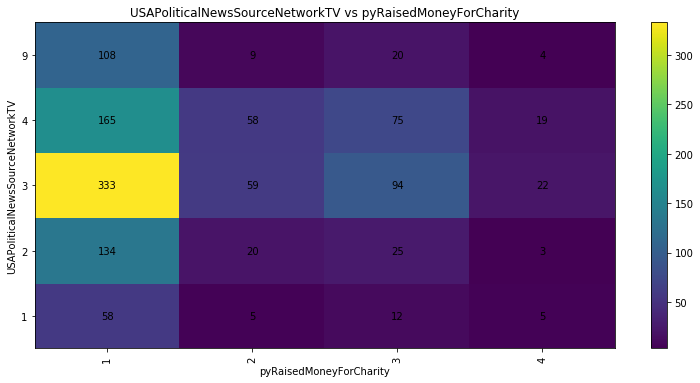

In [108]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceNetworkTV','pyRaisedMoneyForCharity', normalize=False)


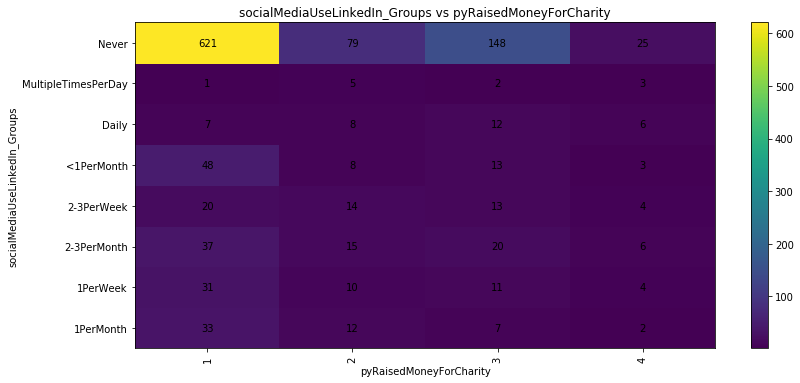

In [109]:
ShowTwoWayHeatmap(data,'socialMediaUseLinkedIn_Groups','pyRaisedMoneyForCharity', normalize=False)



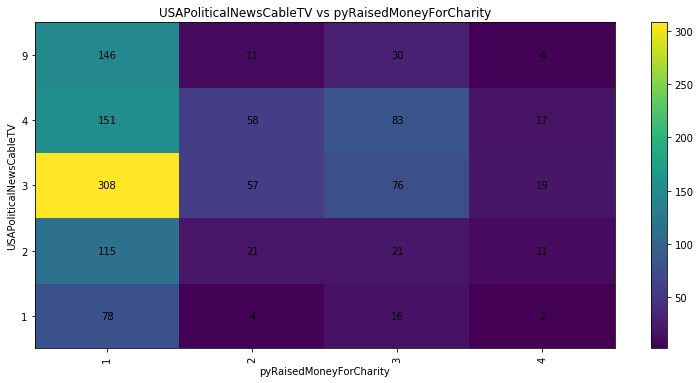

In [110]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsCableTV','pyRaisedMoneyForCharity', normalize=False)



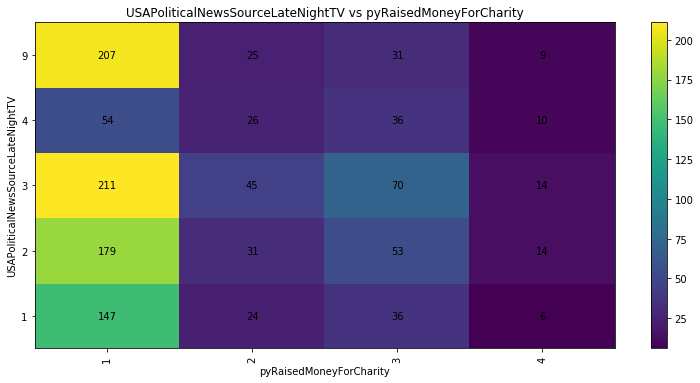

In [111]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLateNightTV','pyRaisedMoneyForCharity', normalize=False)

Insight:

Overall not a lot of people donated to charities last year, with a minor amount donating to charities offline rather than online. We know from the univariate analysis that there was not many people that donated in general, and the ones that did tended to be older. This makes sense if most of the people taking the survey are still in college or have not started a career yet. 

# Boycott Products

In [112]:
BoycottedForCause_results=results[results['Y'].isin(['pyBoycottedForCause_Groups'])].sort_values('p')
#BoycottedForCause_results

In [113]:
BoycottedForCause_media=BoycottedForCause_results[BoycottedForCause_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#BoycottedForCause_media.head(10)

In [114]:
fig = px.scatter(BoycottedForCause_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

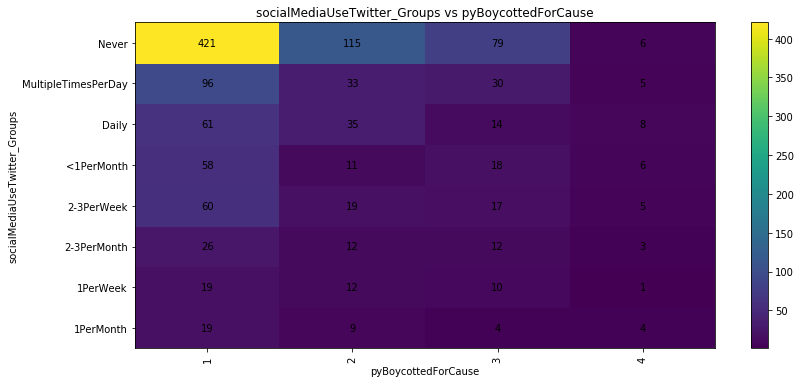

In [115]:
ShowTwoWayHeatmap(data,'socialMediaUseTwitter_Groups','pyBoycottedForCause', normalize=False)



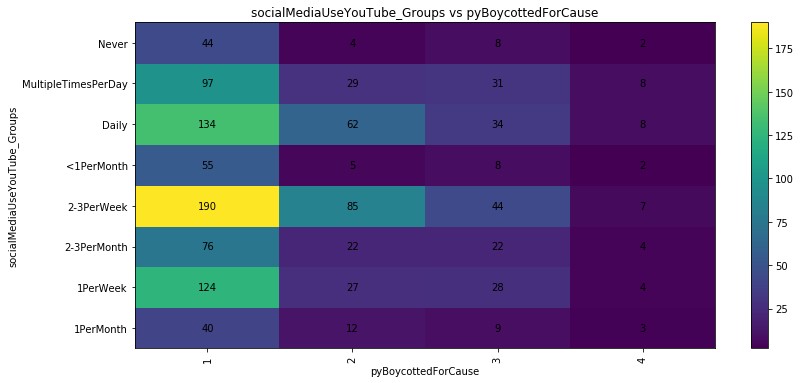

In [116]:
ShowTwoWayHeatmap(data,'socialMediaUseYouTube_Groups','pyBoycottedForCause', normalize=False)



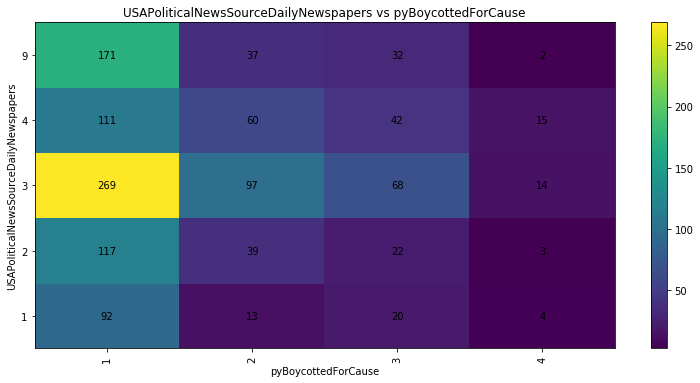

In [117]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceDailyNewspapers','pyBoycottedForCause', normalize=False)



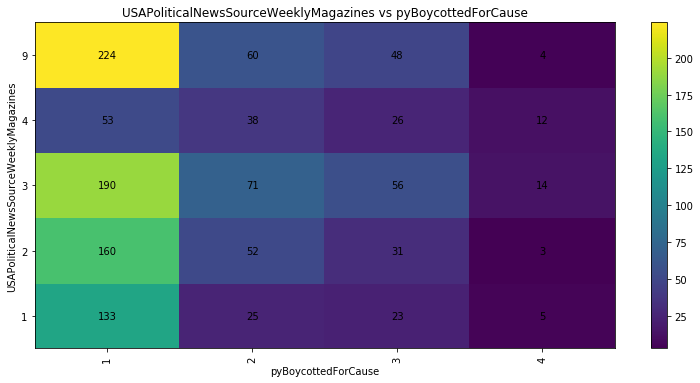

In [118]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceWeeklyMagazines','pyBoycottedForCause', normalize=False)

Insight:

# Attended a Demonstration or Rally

In [119]:
attendedrally_results=results[results['Y'].isin(['pyAttendedRally_Groups'])].sort_values('p')
#attendedrally_results

In [120]:
attendedrally_media=attendedrally_results[attendedrally_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#AttendedRally_media.head(10)

In [121]:
fig = px.scatter(attendedrally_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

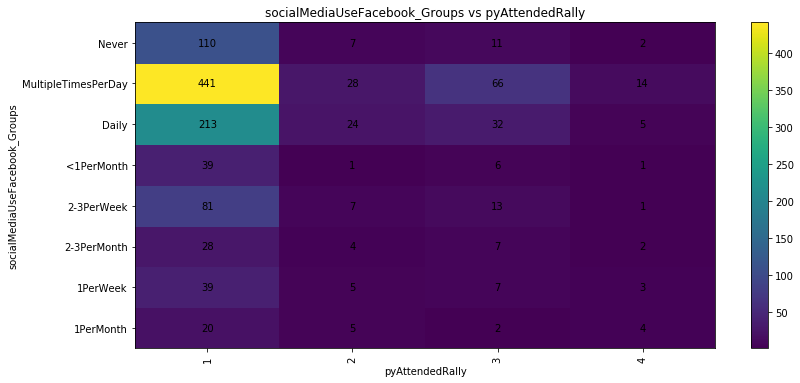

In [122]:
ShowTwoWayHeatmap(data,'socialMediaUseFacebook_Groups','pyAttendedRally', normalize=False)



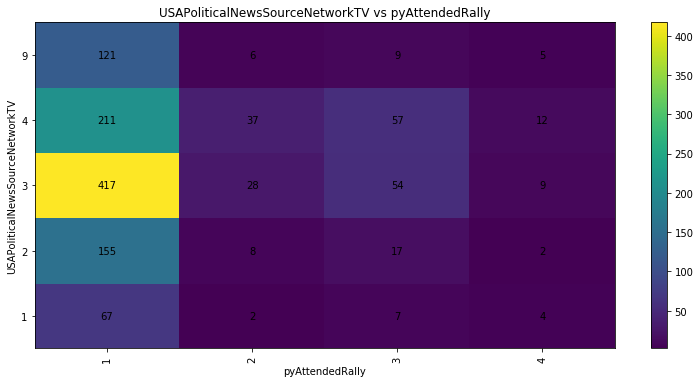

In [123]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceNetworkTV','pyAttendedRally', normalize=False)



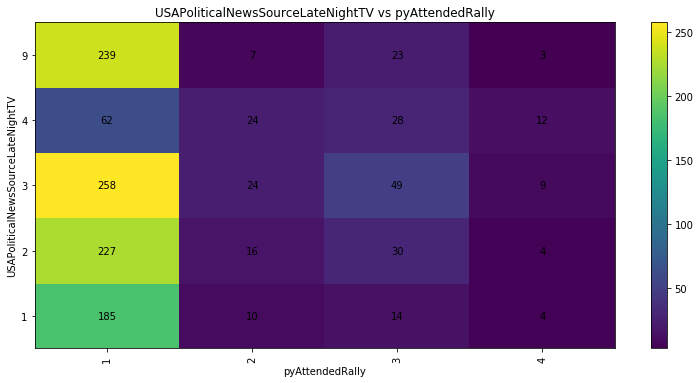

In [124]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLateNightTV','pyAttendedRally', normalize=False)



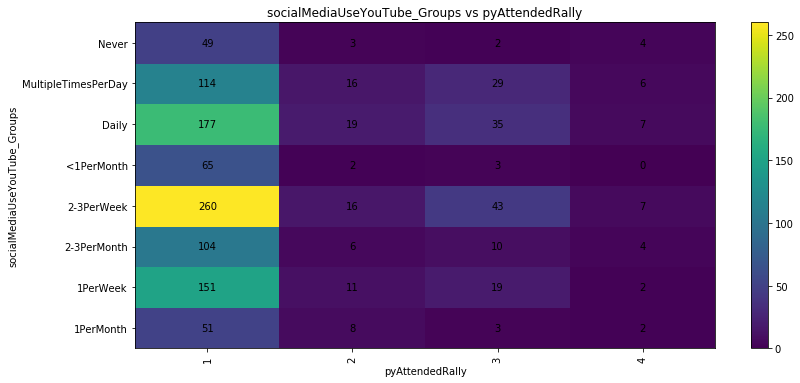

In [125]:
ShowTwoWayHeatmap(data,'socialMediaUseYouTube_Groups','pyAttendedRally', normalize=False)

Insight:

We see some spread, but it is clustered mostly in not attending a rally in the last year. In 2013 much of the larger movements would not have taken place yet, as we see with current events. 

# Made a Donation to a Political or Social Cause

In [126]:
donatedmoneyforcause_results=results[results['Y'].isin(['pyDonatedMoneyForCause_Groups'])].sort_values('p')
#donatedmoneyforcause_results

In [127]:
donatedmoneyforcause_media=donatedmoneyforcause_results[donatedmoneyforcause_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#donatedmoneyforcause_media.head(10)

In [128]:
fig = px.scatter(donatedmoneyforcause_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

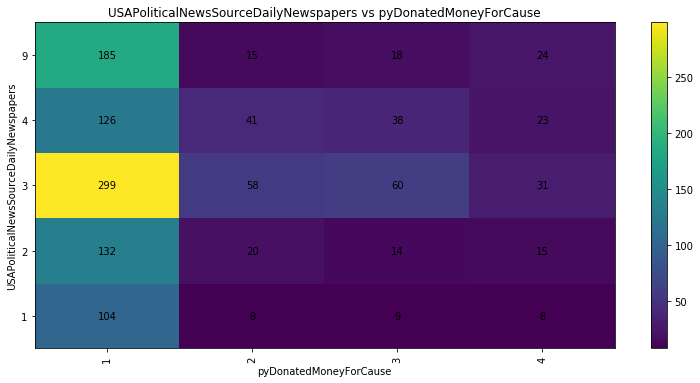

In [129]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceDailyNewspapers','pyDonatedMoneyForCause', normalize=False)



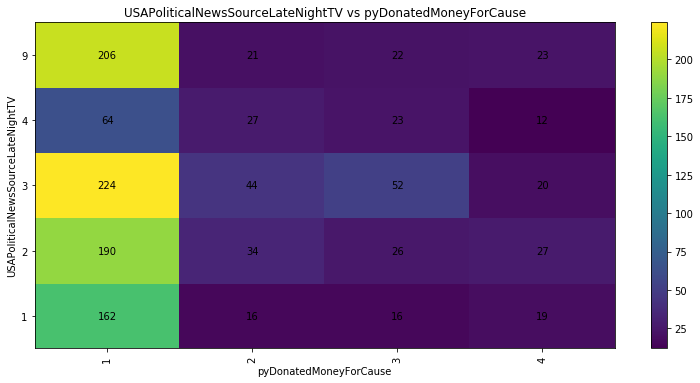

In [130]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLateNightTV','pyDonatedMoneyForCause', normalize=False)



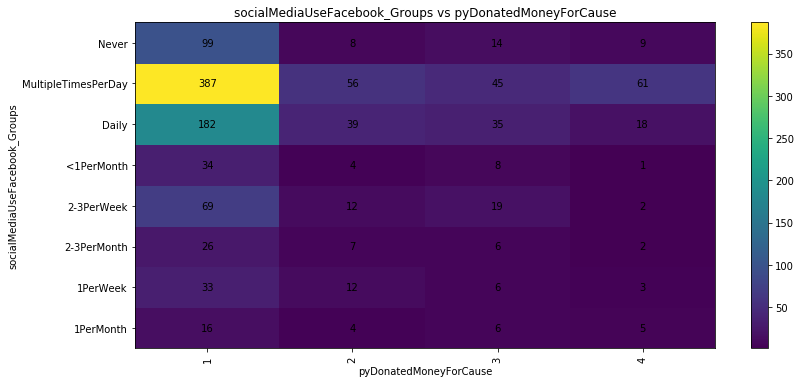

In [131]:
ShowTwoWayHeatmap(data,'socialMediaUseFacebook_Groups','pyDonatedMoneyForCause', normalize=False)



Insight:

We see most of the data in all three graphs clustered in not in the last year. However, we do see some donating to causes both online and offline. I do want to point out that most of the online donations were from those who use Facebook groups multiple times a day. 

# Contacted an Elected Leader or Government Organisation

In [132]:
contacedpolitican_results=results[results['Y'].isin(['pyContacedPolitican_Groups'])].sort_values('p')
#Bcontacedpolitican_results

In [133]:
contacedpolitican_media=contacedpolitican_results[contacedpolitican_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#contacedpolitican_media.head(10)

In [134]:
fig = px.scatter(contacedpolitican_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

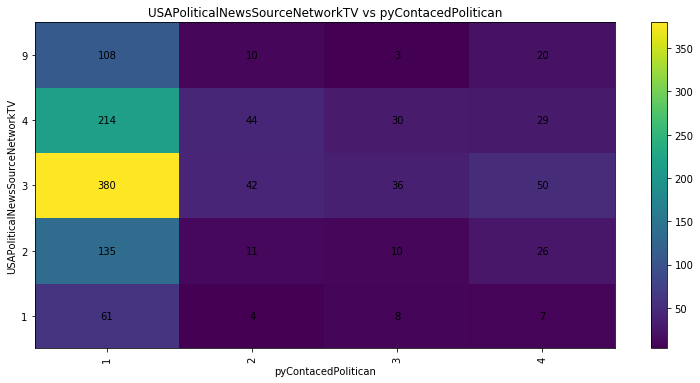

In [135]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceNetworkTV','pyContacedPolitican', normalize=False)



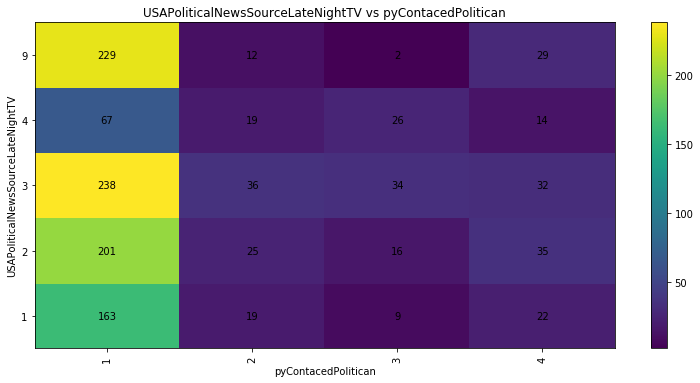

In [136]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLateNightTV','pyContacedPolitican', normalize=False)



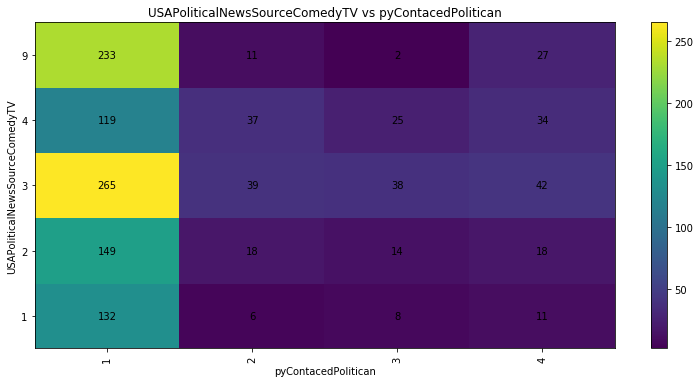

In [137]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceComedyTV','pyContacedPolitican', normalize=False)



Insight:

With contact a politician there is more spread in the amount of our y variable, but predominately it sits in not the last year of the category.  We do see more people reaching out to their politician online, but since this was taken right after an election year, there might not have been much to contact a politician about. 


# Bought a Product for Political, Ethical, or Environmental Reasons

In [138]:
boughtforcause_results=results[results['Y'].isin(['pyBoughtForCause_Groups'])].sort_values('p')
#boughtforcause_results

In [139]:
boughtforcause_media=boughtforcause_results[boughtforcause_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#boughtforcause_media.head(10)

In [140]:
fig = px.scatter(boughtforcause_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

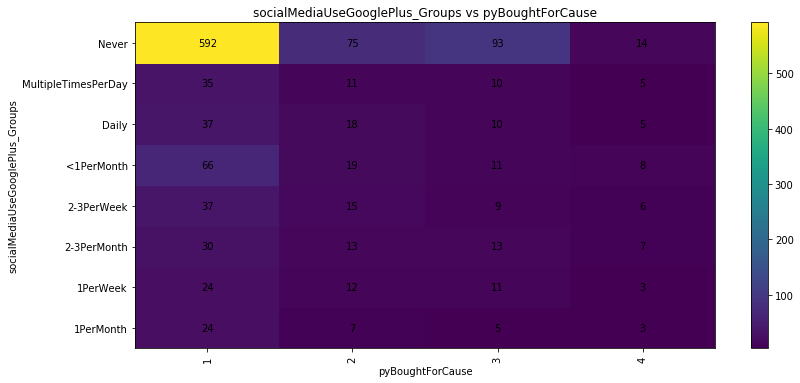

In [141]:
ShowTwoWayHeatmap(data,'socialMediaUseGooglePlus_Groups','pyBoughtForCause', normalize=False)



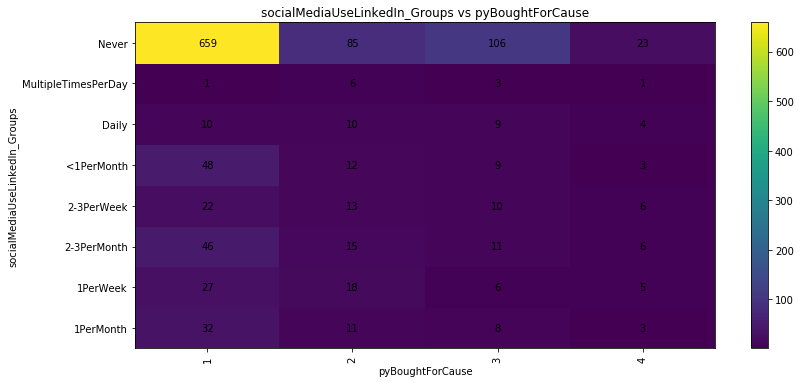

In [142]:
ShowTwoWayHeatmap(data,'socialMediaUseLinkedIn_Groups','pyBoughtForCause', normalize=False)



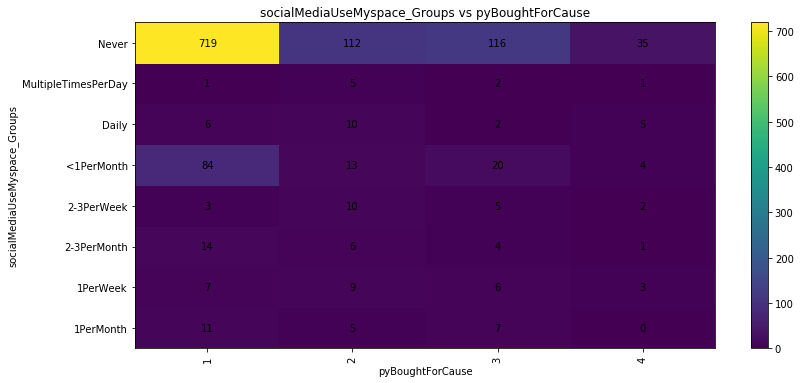

In [143]:
ShowTwoWayHeatmap(data,'socialMediaUseMyspace_Groups','pyBoughtForCause', normalize=False)



Insight:

We see a little bit of people making both online and offline purchases for a cause, but again most didn't in the last year.  

# Signed A Petition

In [144]:
signedpetition_results=results[results['Y'].isin(['pySignedPetition_Groups'])].sort_values('p')
#signedpetition_results

In [145]:
signedpetition_media=signedpetition_results[signedpetition_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#signedpetition_media.head(10)

In [146]:
fig = px.scatter(signedpetition_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

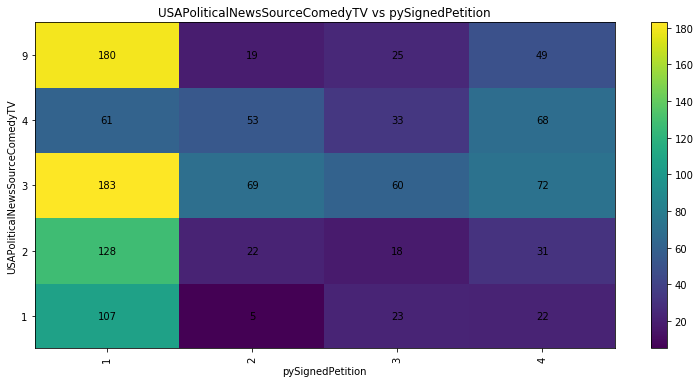

In [147]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceComedyTV','pySignedPetition', normalize=False)

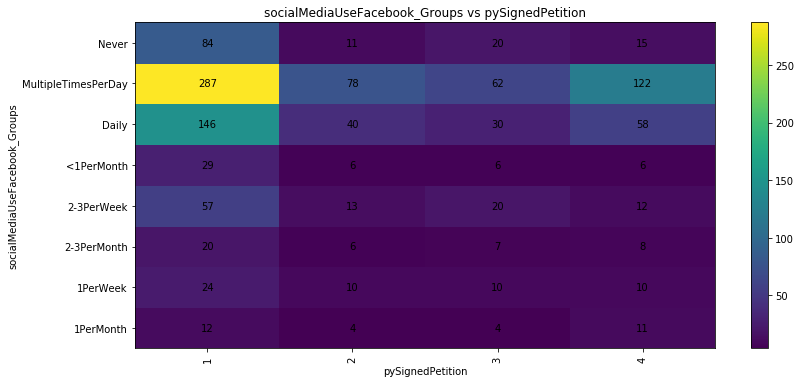

In [148]:
ShowTwoWayHeatmap(data,'socialMediaUseFacebook_Groups','pySignedPetition', normalize=False)

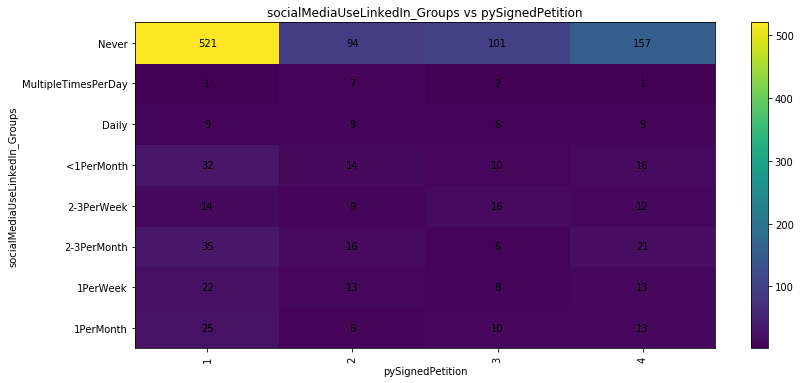

In [149]:
ShowTwoWayHeatmap(data,'socialMediaUseLinkedIn_Groups','pySignedPetition', normalize=False)

Insight:

This section is better as we see a lot more spread in signing a petition. We still have most everyone not signing a petition in the last year, but we do see more from those who got their news from comedy news programs, as well as, those who signed online petitions who got their news from Facebook groups. 

# Voted

In [150]:
voted_results=results[results['Y'].isin(['pyVoted_Groups'])].sort_values('p')
#voted_results

In [151]:
voted_media=voted_results[voted_results['XCategory'].isin(['TraditionalSocialMedia'])].sort_values('p')
#voted_media.head(10)

In [152]:
fig = px.scatter(voted_media, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

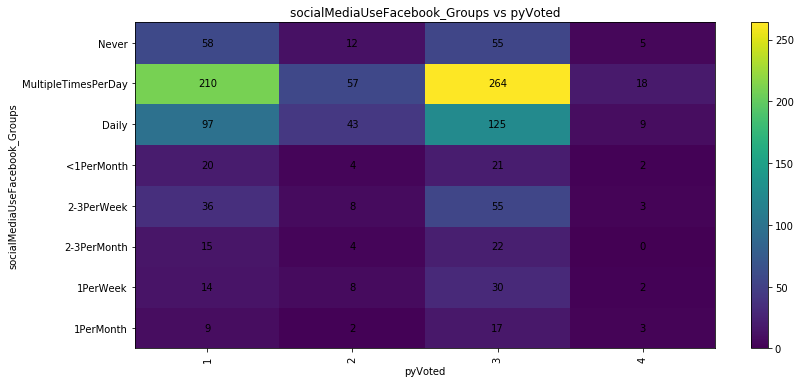

In [153]:
ShowTwoWayHeatmap(data,'socialMediaUseFacebook_Groups','pyVoted', normalize=False)

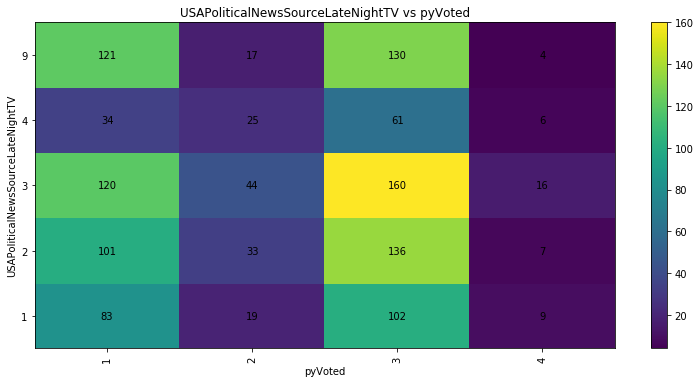

In [154]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLateNightTV','pyVoted', normalize=False)

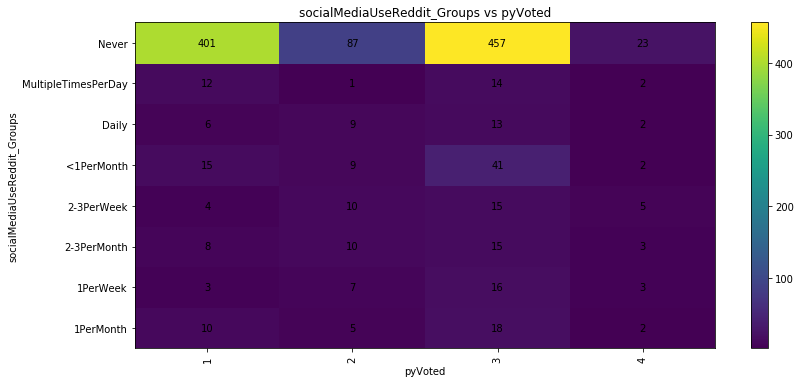

In [155]:
ShowTwoWayHeatmap(data,'socialMediaUseReddit_Groups','pyVoted', normalize=False)

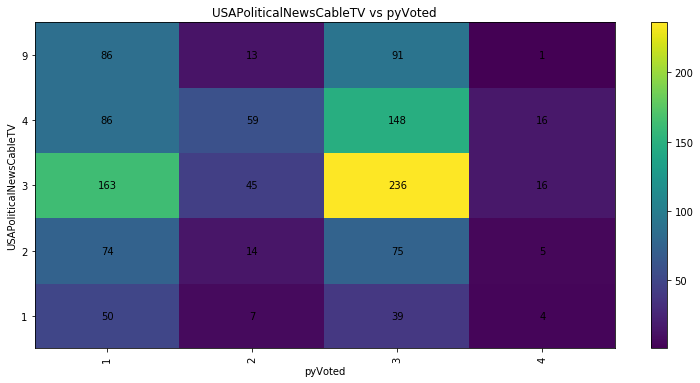

In [156]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsCableTV','pyVoted', normalize=False)

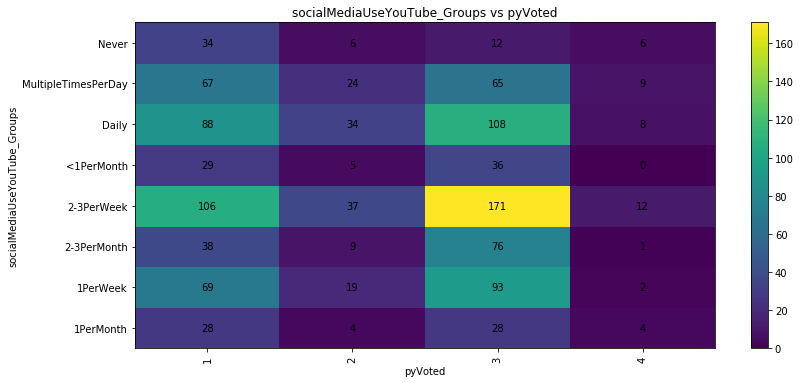

In [157]:
ShowTwoWayHeatmap(data,'socialMediaUseYouTube_Groups','pyVoted', normalize=False)

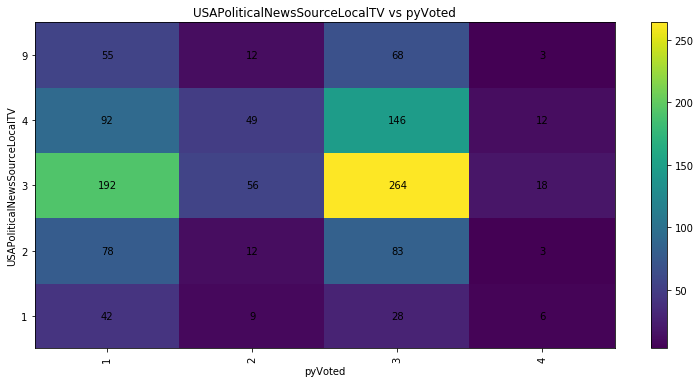

In [158]:
ShowTwoWayHeatmap(data,'USAPoliticalNewsSourceLocalTV','pyVoted', normalize=False)

Insight: 

Finally, we get to see more spread in the category of voting. Again, this survey was taken in 2013, after the re-election of Obama, which has a younger base. So we should be seeing people voting more if they got their news from any source.  However, what stands out is the amount of spread in any of the more video based ingest of political news. There was some variation among the amount of time watching, with most of it being in the middle or 2-3 times a week. This is slightly different from the Reddit and Facebook groups that clustered more around the multiple times a day with Facebook, and never with Reddit. Which seen how Reddit was not yet used as it is today, i.e. the fluctuation of GameStop stock by a Reddit group. 

# Conclusion

Summary of findings:
There was not as much of a significant correlation in various media usage and engagement. After a little research I am guessing that because this survey came out in 2013, which we had just re-elected Obama, there would not be as much engagement from 18-29 year olds outside of voting in the general election; at least not at this point in time. 

Another part that I am seeing because of when this survey is from 2013, we don't see as much of the engaged in activism, and people out fighting for a cause. A modern example, is Black Lives Matter movement, modern forms of environmental, and political causes, both online and offline. Also, we don't see the heavy use of online platforms to spearhead movements that take place offline. We definitely see bits and pieces of engagement starting, but this is definitely a window into the calm before the storm. 

What might else be needed for further analysis: 
I will need to look at age, race, gender, and some of the univariate analysis to gain a fuller picture for the data storytelling and the blog.